In [1]:
using Random

using Plots


In [2]:
rng = MersenneTwister(100921);
x = range(0, 1, length=400)
n_templates = 5

5

In [3]:
W_true = ones((length(x), n_templates))
W_true[:, 2] = 2 * x .- 1
W_true[:, 3] = 6 * (x.^2 - x) .+ 1
W_true[:, 4] = 20 * x .^ 3 - 30 * x .^ 2 + 12 * x .- 1
W_true[:, 5] = 70 * x .^ 4 - 140 * x .^ 3 + 90 * x .^ 2 - 20 * x .+ 1;

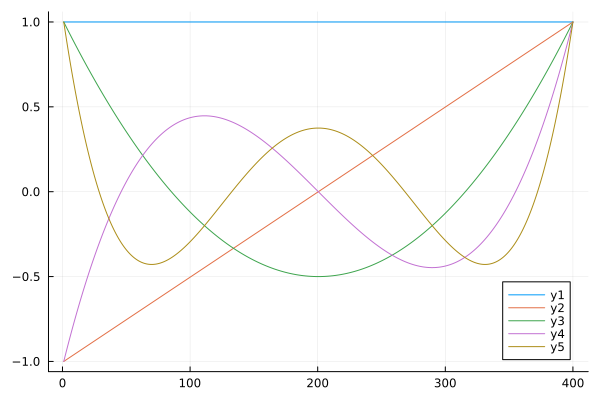

In [4]:
plot(W_true)

In [5]:
n_test = 5000
H_true = rand(rng, Float64, (n_templates, n_test)) * 3 .- 1

X = W_true * H_true;

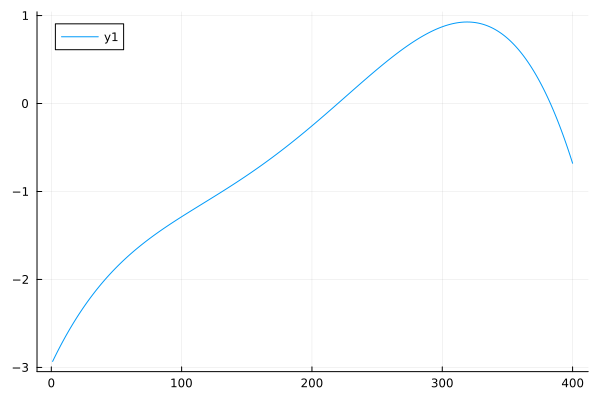

In [6]:
plot(X[:, 20])

In [7]:
H_lsq = (transpose(W_true) * W_true) \ (transpose(W_true) * X)
recon_lsq = W_true * H_lsq

400×5000 Matrix{Float64}:
 2.12704  4.6155    -1.08812   -0.0591587  …  3.38882  -1.2618    -1.08883
 2.0658   4.48464   -1.02126   -0.0804251     3.31057  -1.19677   -1.0299
 2.00601  4.35624   -0.955878  -0.10095       3.23367  -1.13266   -0.971908
 1.94765  4.23026   -0.891953  -0.120742      3.1581   -1.06947   -0.914838
 1.8907   4.10668   -0.82947   -0.13981       3.08383  -1.00718   -0.858684
 1.83515  3.98547   -0.768413  -0.158163   …  3.01087  -0.945794  -0.803439
 1.78096  3.86661   -0.708768  -0.175808      2.93919  -0.885304  -0.749095
 1.72813  3.75007   -0.650519  -0.192755      2.86879  -0.825702  -0.695643
 1.67664  3.63583   -0.593652  -0.209012      2.79965  -0.766981  -0.643077
 1.62646  3.52385   -0.538151  -0.224587      2.73175  -0.709134  -0.591388
 1.57758  3.41412   -0.484001  -0.239489   …  2.66509  -0.652156  -0.540568
 1.52998  3.30661   -0.431187  -0.253727      2.59965  -0.596039  -0.49061
 1.48364  3.20129   -0.379694  -0.267307      2.53541  -0.540777  

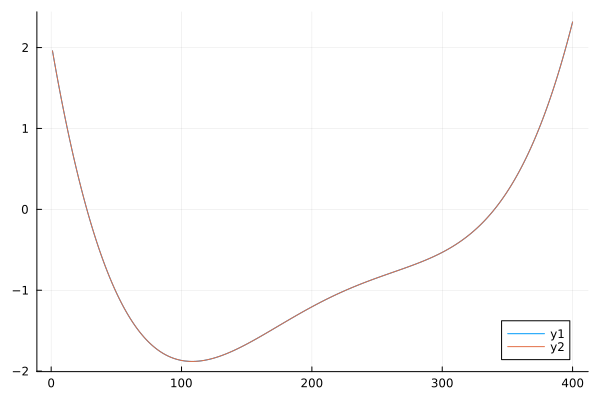

In [8]:
idx = 200
plot(X[:, idx])
plot!(recon_lsq[:, idx])

In [9]:
include("../jl/noodles.jl")

nnls (generic function with 2 methods)

In [10]:
# import Pkg; Pkg.add("BenchmarkTools")
using BenchmarkTools

In [11]:
@benchmark nnls(W_true, X[:, idx])

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  13.083 μs …   4.672 ms  ┊ GC (min … max):  0.00% … 99.10%
 Time  (median):     17.542 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   22.298 μs ± 131.993 μs  ┊ GC (mean ± σ):  19.50% ±  3.29%

               ▂▇██▇▄▄                                          
  ▁▂▄▃▃▂▂▂▂▂▃▅▇████████▇▆▅▅▅▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  13.1 μs         Histogram: frequency by time         28.6 μs <

 Memory estimate: 62.25 KiB, allocs estimate: 107.

In [12]:
H_noodles = zeros(size(H_lsq))

for i in 1:(size(X)[2])
    H_noodles[:, i] = nnls(W_true, X[:, i])
end

In [13]:
recon_noodles = W_true * H_noodles;

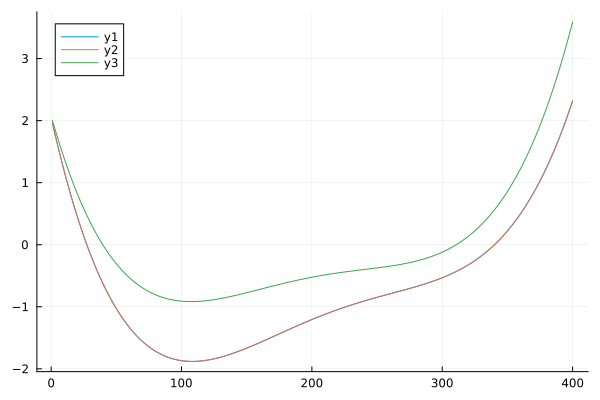

In [14]:
idx = 200
plot(X[:, idx])
plot!(recon_lsq[:, idx])
plot!(recon_noodles[:, idx])